In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
#function to combine picks and point values
def combine(df1):
    my_file = df1.copy()
    rows = my_file.shape[0]
    i = 2 
    while i < rows:
        for col in my_file.loc[:, my_file.columns != 'Game']:
            my_file[col][i+1] = float(my_file[col][i+1])
            my_file[col][i] = [my_file[col][i], my_file[col][i+1]]
        i = i+2
    
    my_file.drop([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41], axis=0, inplace=True)
    return my_file

#function to calculate totals
def totals(df):
    max_score = 0
    games = len(df.columns)-1
    points = 16
    while games > 0:
        max_score = max_score + points
        points = points - 1
        games = games - 1
    i = 4  
    df['Score'] = 0
    df['Game Count'] = 0
    df['Max Score'] = max_score
    while i < 41:
        for col in df.loc[:, ~df.columns.isin(['Game', 'Score', 'Game Count', 'Max Score'])]:
            if df[col][0] is np.nan:
                break
            
            elif df[col][0] == df[col][i][0]:
                df.loc[i, 'Game Count'] = df.loc[i, 'Game Count'] + 1
                df.loc[i, 'Score'] = df.loc[i, 'Score'] + df.loc[i, col][1]
            
            else:  
                df.loc[i, 'Max Score'] = df.loc[i, 'Max Score'] - df.loc[i, col][1]
               
        i = i + 2
    return df

#upset counter
def upset_counter(df):
    upset_count = 0
    fav_count = 0
    tie_count = 0
    dog_spread_tot = 0
    big_dog_count = 0
    for col in df.loc[:, ~df.columns.isin(['Game', 'Score', 'Max Score'])]:
        if df[col][3] < 0 and df[col][1] == df[col][0]: #if home team is favorite and away team won
            upset_count = upset_count + 1
            dog_spread_tot = dog_spread_tot + -(df[col][3])
            print('Road upset alert ', df[col][0], "spread ", -(df[col][3]))
            if abs(df[col][3]) > 6.5:
                big_dog_count = big_dog_count + 1
                print("big dog woof woof")
        elif df[col][3] > 0 and df[col][2][0] == df[col][0]: #if away team is favorite and home team won
            upset_count = upset_count + 1
            dog_spread_tot = dog_spread_tot + df[col][3]
            print('Home dog win ', df[col][2])
            if abs(df[col][3]) > 6.5:
                big_dog_count = big_dog_count + 1
                print("big dog woof woof")
        elif df[col][0] == "TIE":
            tie_count = tie_count + 1
            print("A friggen tie...  ", df[col][2])
        else:
            fav_count = fav_count + 1
    
    dog_spread_avg = round(dog_spread_tot/upset_count, 2)
    print("Total of ", upset_count, "upsets this week. With ", big_dog_count, "being big dogs." )
    return upset_count, dog_spread_avg, big_dog_count #fav_count, tie_count

#number of total picks for league
def num_picks(df):
    games = len(df.axes[1])-1
    enteries = (len(df.axes[0])-4)/2
    total_picks = games * enteries
    return total_picks

#finds avg points per win for league
def points_per_win (df):
    total_wins = df['Game Count'].sum()
    total_points = df['Score'].sum()
    avg_pts_per_win = total_points/total_wins
    points = round(avg_pts_per_win, 2)
    return points

#sum total points each week
def sum_totals(season_totals, week_stats, week_number_rank):
    season_totals[['Score', 'Game Count']] = season_totals[['Score', 'Game Count']] + week_stats[['Score', 'Game Count']]
    season_totals[week_number_rank] = season_totals['Score'].rank(ascending=False, method='min')

    return season_totals


In [131]:
#read the result files
week1_raw = pd.read_csv("week1_results.csv")
week2_raw = pd.read_csv("Week2_results.csv")
week3_raw = pd.read_csv("week3_results.csv")
week4_raw = pd.read_csv("week4_results.csv")
week5_raw = pd.read_csv("Week5_results.csv")
week6_raw = pd.read_csv("week6_results.csv")

#clean data, combine bets with picks
week1 = combine(week1_raw)
week2 = combine(week2_raw)
week3 = combine(week3_raw)
week4 = combine(week4_raw)
week5 = combine(week5_raw)
week6 = combine(week6_raw)

#calculate total points and picks
week1_tot = totals(week1)
week2_tot = totals(week2)
week3_tot = totals(week3)
week4_tot = totals(week4)
week5_tot = totals(week5)
week6_tot = totals(week6)

#create stats df with total points and picks
#also redefine index to username
week1_stats = week1_tot[['Game', 'Score', 'Game Count']][4:]
week1_stats.set_index('Game', inplace=True)
week2_stats = week2_tot[['Game', 'Score', 'Game Count']][4:]
week2_stats.set_index('Game', inplace=True)
week3_stats = week3_tot[['Game', 'Score', 'Game Count']][4:]
week3_stats.set_index('Game', inplace=True)
week4_stats = week4_tot[['Game', 'Score', 'Game Count']][4:]
week4_stats.set_index('Game', inplace=True)
week5_stats = week5_tot[['Game', 'Score', 'Game Count']][4:]
week5_stats.set_index('Game', inplace=True)
week6_stats = week6_tot[['Game', 'Score', 'Game Count']][4:]
week6_stats.set_index('Game', inplace=True)

#create season total df 
season_totals = pd.DataFrame(week1_stats.copy(), columns=['Score', 'Game Count'])
season_totals['Week 1 Rank'] = season_totals['Score'].rank(ascending=False, method='min')

#use sum_total function to add points for season total 
sum_totals(season_totals, week2_stats, 'Week 2 Rank')
sum_totals(season_totals, week3_stats, 'Week 3 Rank')
sum_totals(season_totals, week4_stats, 'Week 4 Rank')
sum_totals(season_totals, week5_stats, 'Week 5 Rank')
sum_totals(season_totals, week6_stats, 'Week 6 Rank')

#caluculate the position change from the previous week 
season_totals['Rank Change'] = round(season_totals[season_totals.columns[len(season_totals.columns)-1]]-season_totals[season_totals.columns[len(season_totals.columns)-2]], 0)


In [132]:
#create weely totals df to track totals each week
weekly_totals = pd.concat([week1_stats.rename(columns={"Score": "Week 1 Score", "Game Count": "Week 1 Game Count"}),
 week2_stats.rename(columns={"Score": "Week 2 Score", "Game Count": "Week 2 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week3_stats.rename(columns={"Score": "Week 3 Score", "Game Count": "Week 3 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week4_stats.rename(columns={"Score": "Week 4 Score", "Game Count": "Week 4 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week5_stats.rename(columns={"Score": "Week 5 Score", "Game Count": "Week 5 Game Count"})], axis=1)
weekly_totals = pd.concat([weekly_totals, week6_stats.rename(columns={"Score": "Week 6 Score", "Game Count": "Week 6 Game Count"})], axis=1)
 

In [133]:
season_totals[['Score', 'Game Count', 'Week 6 Rank', 'Rank Change']].sort_values(['Week 6 Rank']).head()

,Score,Game Count,Week 6 Rank,Rank Change
Game,,,,
Bob Z,497,62,1.0,0.0
Ken,490,55,2.0,0.0
Zapp,470,57,3.0,-2.0
Lindsey,465,55,4.0,2.0
Kathy Zwartz,461,55,5.0,-1.0


In [134]:
week6_stats = week6_tot[['Game', 'Score', 'Game Count', 'Max Score']][4:]
week6_stats['Week 6 Rank'] = week6_stats['Score'].rank(ascending=False)
week6_stats.sort_values(['Max Score'], ascending=False).head()

,Game,Score,Game Count,Max Score,Week 6 Rank
34,Team Boylan,96,11,96,1.0
32,taz7611,86,9,86,2.0
14,Ken,85,9,85,3.0
38,Wild Bill,79,9,79,4.0
18,Lizzy_Z,72,8,72,5.5


In [ ]:
#upset count week 1
upset_count1 = upset_counter(week1)
upset_count2 = upset_counter(week2)
upset_count3 = upset_counter(week3)
upset_count4 = upset_counter(week4)
upset_count5 = upset_counter(week5)
upset_count6 = upset_counter(week6)

In [136]:
tots = {'Week': 1, 'Correct Pick Percentage': round(week1_stats['Game Count'].sum()/num_picks(week1_raw)*100, 2), 'Avg Points per Win': points_per_win(week1_stats), 'Upset count': upset_count1[0], 'Avg Upset Spread': upset_count1[1]}
weekly_stats = pd.DataFrame(tots, index=[0])
weekly_stats.loc[len(weekly_stats.index)] = [2, round(week2_stats['Game Count'].sum()/num_picks(week2_raw)*100, 2), points_per_win(week2_stats), upset_count2[0], upset_count2[1]] 
weekly_stats.loc[len(weekly_stats.index)] = [3, round(week3_stats['Game Count'].sum()/num_picks(week3_raw)*100, 2), points_per_win(week3_stats), upset_count3[0], upset_count3[1]] 
weekly_stats.loc[len(weekly_stats.index)] = [4, round(week4_stats['Game Count'].sum()/num_picks(week4_raw)*100, 2), points_per_win(week4_stats), upset_count4[0], upset_count4[1]] 
weekly_stats.loc[len(weekly_stats.index)] = [5, round(week5_stats['Game Count'].sum()/num_picks(week5_raw)*100, 2), points_per_win(week5_stats), upset_count5[0], upset_count5[1]] 
weekly_stats.loc[len(weekly_stats.index)] = [6, round(week6_stats['Game Count'].sum()/num_picks(week6_raw)*100, 2), points_per_win(week6_stats), upset_count6[0], upset_count6[1]] 
weekly_stats



,Week,Correct Pick Percentage,Avg Points per Win,Upset count,Avg Upset Spread
0,1.0,51.97,7.41,6.0,4.75
1,2.0,52.96,9.05,5.0,5.40
2,3.0,50.00,8.53,9.0,3.33
3,4.0,57.57,8.78,5.0,2.80
4,5.0,61.84,9.12,4.0,5.88
5,6.0,53.76,8.80,7.0,4.57


Text(0.5, 0, 'Week')

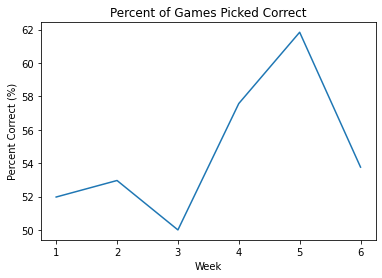

In [137]:
plt.plot(weekly_stats['Week'], weekly_stats['Correct Pick Percentage'])
plt.title('Percent of Games Picked Correct')
plt.ylabel('Percent Correct (%)')
#plt.ylim([25, 75])
plt.xlabel("Week")

In [138]:
weekly_totals.head()

,Week 1 Score,Week 1 Game Count,Week 2 Score,Week 2 Game Count,Week 3 Score,Week 3 Game Count,Week 4 Score,Week 4 Game Count,Week 5 Score,Week 5 Game Count,Week 6 Score,Week 6 Game Count
Game,,,,,,,,,,,,
abfarias,52,7,74,7,84,8,83,8,81,9,46,6
Bob Z,72,11,86,10,61,9,101,11,105,13,72,8
Ellieisawesome1,61,8,114,14,56,8,51,6,93,10,54,6
JJapcon,60,8,81,9,65,6,102,10,76,8,51,6
Kathy Zwartz,97,13,79,9,66,8,73,9,87,9,59,7
